In [4]:
import sqlite3

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


## Connect to Database
create train and test data

In [5]:
connection = sqlite3.connect('races1.db')
table_name = 'g_final_table'
query = f'SELECT * FROM "{table_name}"'
data = pd.read_sql_query(query, connection)

data = data.reset_index(drop=True)

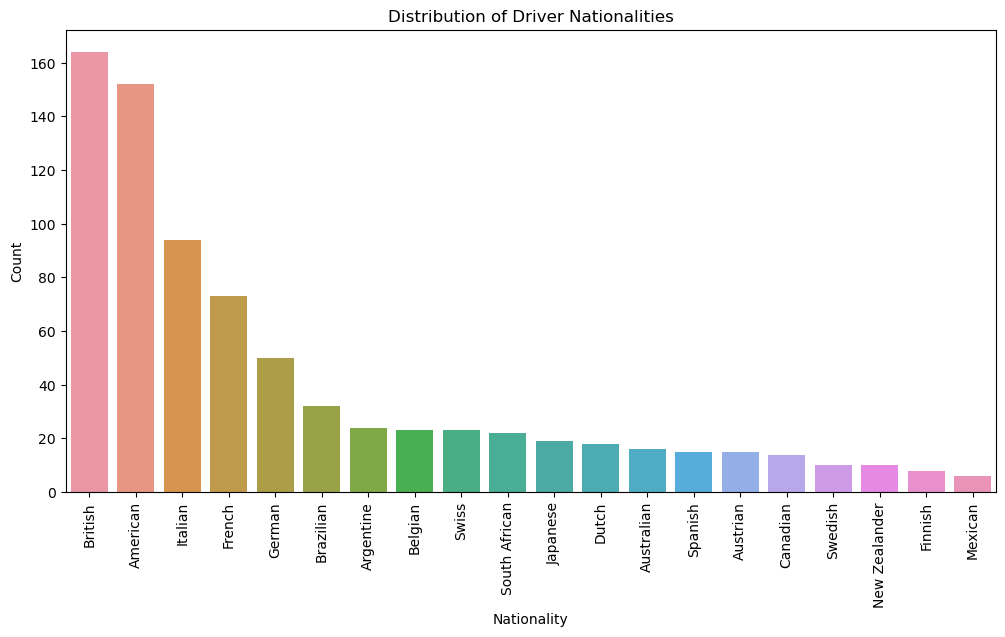

In [6]:
# Filter the DataFrame to keep unique driver-nationality pairs
unique_driver_nationality = data.copy()
unique_driver_nationality = unique_driver_nationality[['driver', 'nationality']].drop_duplicates()
unique_driver_nationality['nationality'] = unique_driver_nationality['nationality'].str.replace('East German', 'German')

plt.figure(figsize=(12, 6))
sns.countplot(data=unique_driver_nationality, x="nationality", order=unique_driver_nationality["nationality"].value_counts()[:20].index)
plt.title("Distribution of Driver Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [7]:
unique_driver_nationality.sort_values(by='driver').reset_index(drop=True)

,driver,nationality
0,Cannoc,Canadian
1,Changy,Belgian
2,abate,Italian
3,abecassis,British
4,acheson,British
5,adamich,Italian
6,adams,Belgian
7,ader,American
8,adolff,German
9,agabashian,American


In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="date_of_birth", binwidth=5, kde=True)
plt.title("Distribution of Driver Ages")
plt.xlabel("Date of Birth")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="qualifying_time", kde=True)
plt.title("Distribution of Qualifying Times")
plt.xlabel("Qualifying Time")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="season", y="driver_standings_pos", estimator="mean", label="Driver")
sns.lineplot(data=df, x="season", y="constructor_standings_pos", estimator="mean", label="Constructor")
plt.title("Average Standings by Season")
plt.xlabel("Season")
plt.ylabel("Average Standings Position")
plt.legend()
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>

In [11]:
season_drivers = df[df['season'] == 2023].driver.unique()
season_drivers

NameError: name 'df' is not defined

In [12]:
marina = df[(df['circuit_id'] == 'marina_bay') & (df['driver'].isin(season_drivers))]
marina

NameError: name 'df' is not defined

In [13]:
lec = df[df['driver'] == 'leclerc']
lec

NameError: name 'df' is not defined

In [14]:
marina = max[max['circuit_id'] == 'marina_bay']
marina

TypeError: 'builtin_function_or_method' object is not subscriptable

In [15]:
marina_lec = lec[lec['circuit_id'] == 'marina_bay']
marina_lec

NameError: name 'lec' is not defined